<a href="https://colab.research.google.com/github/rakenny1985/Final-Project/blob/master/FINAL_PROJECT_OLS_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys                         
import numpy as np                  
import pandas as pd                    
import matplotlib.pyplot as plt               
import seaborn as sns              
import datetime as dt

In [3]:
us = pd.read_excel("oecd_rkedits_FINALPROJECT.xlsx")
print(us.head(5))



          unique_id  Year       Country  bilat_oda  social_infrastructure  \
0        Angola2005  2005        Angola      63.67                  26.88   
1         Benin2005  2005         Benin      21.80                  16.21   
2      Botswana2005  2005      Botswana      34.95                  32.42   
3  Burkina Faso2005  2005  Burkina Faso      33.11                  14.91   
4       Burundi2005  2005       Burundi      59.05                  13.61   

   education  water_supply_sanitation  economic_infrastructure  energy  \
0       0.00                      0.0                     0.82    0.00   
1       3.17                      0.0                     0.00    0.00   
2       0.00                      0.0                     0.47    0.47   
3      12.90                      0.0                     0.00    0.00   
4       0.00                      0.0                     0.00    0.00   

   transport  production  ag_forestry_fishing  idustry_mining_construction  \
0        0.0  

In [4]:
polity = pd.read_excel("Polity_IV_country_gov_type_unique_FINALPROJECT.xlsx")
print(polity.head(5))

           unique_id scode        country  year  democ  autoc  polity
0  United States1946   USA  United States  1946     10      0      10
1  United States1947   USA  United States  1947     10      0      10
2  United States1948   USA  United States  1948     10      0      10
3  United States1949   USA  United States  1949     10      0      10
4  United States1950   USA  United States  1950     10      0      10


In [5]:
freedom=pd.read_excel('human_freedom_sub_saharan_rk_edit_FINALPROJECT.xlsx')
freedom.dropna()
freedom.dtypes

unique_id                  object
Year                        int64
ISO Code                   object
Countries                  object
Region                     object
human_freedom_score       float64
human_freedom_rank          int64
personal_freedom_score    float64
personal_freedom_rank       int64
economic_freedom_score    float64
economic_freedom_rank       int64
dtype: object

In [0]:
freedom = freedom[np.isfinite(freedom['human_freedom_score'])]

In [7]:
wb=pd.read_excel('world_bank_gdp_RKEDIT_FINALPROJECT.xlsx')
print(wb.head(5))

    unique_id    name code    year gdp_per_capita
0  Angola2000  Angola  AGO  2000.0        2189.56
1  Angola2001  Angola  AGO  2001.0        2208.79
2  Angola2002  Angola  AGO  2002.0        2426.43
3  Angola2003  Angola  AGO  2003.0        2412.39
4  Angola2004  Angola  AGO  2004.0        2582.65


In [8]:
print (list(wb))
print(list(freedom))
print (list(polity))
print(list(us))

['unique_id', 'name', 'code', 'year', 'gdp_per_capita']
['unique_id', 'Year', 'ISO Code', 'Countries', 'Region', 'human_freedom_score', 'human_freedom_rank', 'personal_freedom_score', 'personal_freedom_rank', 'economic_freedom_score', 'economic_freedom_rank']
['unique_id', 'scode', 'country', 'year', 'democ', 'autoc', 'polity']
['unique_id', 'Year', 'Country', 'bilat_oda', 'social_infrastructure', 'education', 'water_supply_sanitation', 'economic_infrastructure', 'energy', 'transport', 'production', 'ag_forestry_fishing', 'idustry_mining_construction', 'trade_tourism', 'multi', 'program_assistance', 'food_aid', 'debt', 'humanitarian_aid', 'unspecified']


In [9]:
data_us_new = us[["unique_id","Year", "bilat_oda"]]
print(data_us_new.head(3))
data_freedom_new = freedom[["unique_id", "human_freedom_score"]]
print(data_freedom_new.head(3))
data_wb_new = wb[["unique_id", "gdp_per_capita"]]
print(data_wb_new.head(3))
data_polity_new = polity[["unique_id", "polity"]]
print(data_polity_new.head(3))

      unique_id  Year  bilat_oda
0    Angola2005  2005      63.67
1     Benin2005  2005      21.80
2  Botswana2005  2005      34.95
      unique_id  human_freedom_score
0    Angola2016             5.640662
1     Benin2016             6.738488
2  Botswana2016             7.153167
    unique_id gdp_per_capita
0  Angola2000        2189.56
1  Angola2001        2208.79
2  Angola2002        2426.43
           unique_id  polity
0  United States1946      10
1  United States1947      10
2  United States1948      10


In [10]:
data_aid_country = data_wb_new.merge(data_freedom_new, on="unique_id", how="inner")

print(data_aid_country.tail(10))


        unique_id gdp_per_capita  human_freedom_score
260    Zambia2014        1620.82             6.331482
261    Zambia2015        1618.46             6.434490
262  Zimbabwe2008        662.487             4.935571
263  Zimbabwe2009        728.566             4.927673
264  Zimbabwe2010        854.848             4.909415
265  Zimbabwe2011        955.805             5.050736
266  Zimbabwe2012        1090.52             5.084810
267  Zimbabwe2013        1086.83             5.347535
268  Zimbabwe2014        1086.87             5.467683
269  Zimbabwe2015        1080.57             5.582640


In [11]:
data_aid_country1 = data_aid_country.merge(data_polity_new, on="unique_id", how="inner")
print(data_aid_country1.tail(10))

        unique_id gdp_per_capita  human_freedom_score  polity
242    Zambia2014        1620.82             6.331482       7
243    Zambia2015        1618.46             6.434490       7
244  Zimbabwe2008        662.487             4.935571      -4
245  Zimbabwe2009        728.566             4.927673       1
246  Zimbabwe2010        854.848             4.909415       1
247  Zimbabwe2011        955.805             5.050736       1
248  Zimbabwe2012        1090.52             5.084810       1
249  Zimbabwe2013        1086.83             5.347535       4
250  Zimbabwe2014        1086.87             5.467683       4
251  Zimbabwe2015        1080.57             5.582640       4


In [12]:
data_aid_country1.dtypes

unique_id               object
gdp_per_capita          object
human_freedom_score    float64
polity                   int64
dtype: object

In [0]:
data_aid_country1['human_freedom_score']=pd.to_numeric(data_aid_country1['human_freedom_score'],errors='coerce')

In [14]:
data_aid_country1.dtypes

unique_id               object
gdp_per_capita          object
human_freedom_score    float64
polity                   int64
dtype: object

In [15]:
data_aid_country1['gdp_per_capita']=pd.to_numeric(data_aid_country1['gdp_per_capita'],errors='coerce')
data_aid_country1.dtypes

unique_id               object
gdp_per_capita         float64
human_freedom_score    float64
polity                   int64
dtype: object

In [16]:
data_aid_country1.set_index('unique_id')

,gdp_per_capita,human_freedom_score,polity
unique_id,,,
Angola2008,3641.447502,4.823528,-2
Angola2009,3544.026552,5.206898,-2
Angola2010,3585.905553,5.237695,-2
Angola2011,3580.269910,5.354951,-2
Angola2012,3750.209097,5.832180,-2
Angola2013,3799.429617,5.994839,-2
Angola2014,3846.240911,5.618964,-2
Angola2015,3751.694465,5.786479,-2
Benin2008,767.031819,6.490138,7


In [17]:
data_us_new.set_index('unique_id')

,Year,bilat_oda
unique_id,,
Angola2005,2005,63.67
Benin2005,2005,21.80
Botswana2005,2005,34.95
Burkina Faso2005,2005,33.11
Burundi2005,2005,59.05
Cabo Verde2005,2005,116.38
Cameroon2005,2005,15.22
Central African Republic2005,2005,15.85
Chad2005,2005,60.56


In [18]:
data_aid_country2 = data_aid_country1.merge(data_us_new, on="unique_id", how="inner")
print(data_aid_country2.tail(10))

        unique_id  gdp_per_capita  human_freedom_score  polity  Year  \
242    Zambia2014     1620.823290             6.331482       7  2014   
243    Zambia2015     1618.457665             6.434490       7  2015   
244  Zimbabwe2008      662.486544             4.935571      -4  2008   
245  Zimbabwe2009      728.566274             4.927673       1  2009   
246  Zimbabwe2010      854.847665             4.909415       1  2010   
247  Zimbabwe2011      955.805432             5.050736       1  2011   
248  Zimbabwe2012     1090.521582             5.084810       1  2012   
249  Zimbabwe2013     1086.826568             5.347535       4  2013   
250  Zimbabwe2014     1086.873532             5.467683       4  2014   
251  Zimbabwe2015     1080.572518             5.582640       4  2015   

     bilat_oda  
242     307.73  
243     306.16  
244     234.36  
245     286.55  
246     207.83  
247     182.55  
248     168.54  
249     158.48  
250     166.70  
251     182.04  


In [19]:
df=data_aid_country2.set_index('Year')
df

,unique_id,gdp_per_capita,human_freedom_score,polity,bilat_oda
Year,,,,,
2008,Angola2008,3641.447502,4.823528,-2,55.52
2009,Angola2009,3544.026552,5.206898,-2,51.52
2010,Angola2010,3585.905553,5.237695,-2,100.66
2011,Angola2011,3580.269910,5.354951,-2,73.81
2012,Angola2012,3750.209097,5.832180,-2,70.49
2013,Angola2013,3799.429617,5.994839,-2,58.54
2014,Angola2014,3846.240911,5.618964,-2,57.26
2015,Angola2015,3751.694465,5.786479,-2,49.23
2008,Benin2008,767.031819,6.490138,7,80.22


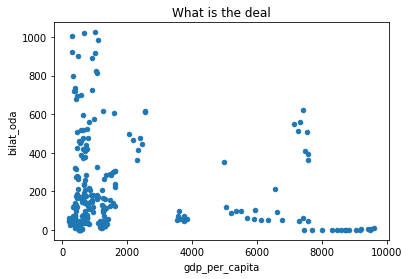

In [20]:
df.plot(y='bilat_oda',x='gdp_per_capita',kind='scatter',title='What is the deal')

In [21]:
import statsmodels.api as sm # import statsmodels 
X = df["gdp_per_capita"]
y = df["bilat_oda"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              bilat_oda   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     28.88
Date:                Fri, 10 May 2019   Prob (F-statistic):           1.76e-07
Time:                        22:24:11   Log-Likelihood:                -1796.2
No. Observations:                 252   AIC:                             3594.
Df Residuals:                     251   BIC:                             3598.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gdp_per_capita     0.0319      0.006      5.374      0.000       0.020       0.044
==============================================================================
Omnibus:                       47.581   Durbin-Watson:                   0.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.793
Skew:                           1.115   Prob(JB):                     2.57e-16
Kurtosis:                       4.366   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
df["logGDP"] = np.log(df["gdp_per_capita"])
df["logbilat"] = np.log(df["bilat_oda"])

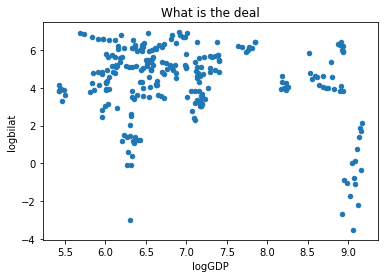

In [23]:
df.plot(y='logbilat',x='logGDP',kind='scatter',title='What is the deal')

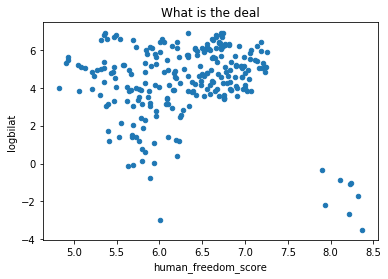

In [24]:
df.plot(y='logbilat',x='human_freedom_score',kind='scatter',title='What is the deal')

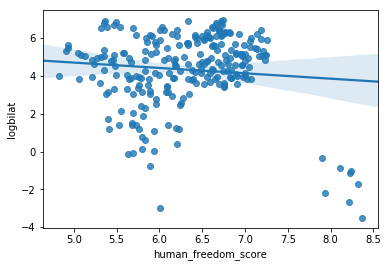

In [25]:
sns.regplot (y='logbilat', x='human_freedom_score', data=df)

In [29]:
import statsmodels.api as sm # import statsmodels 
X = df[["logGDP","human_freedom_score","polity"]]
y = df["logbilat"]
#MV REGRESSION FOR ANALYSIS
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logbilat   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     375.3
Date:                Fri, 10 May 2019   Prob (F-statistic):           4.68e-92
Time:                        22:26:37   Log-Likelihood:                -535.12
No. Observations:                 252   AIC:                             1076.
Df Residuals:                     249   BIC:                             1087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
logGDP                 -0.1763      0.125     -1.416      0.158      -0.422       0.069
human_freedom_score     0.9108      0.141      6.438      0.000       0.632       1.189
polity                 -0.0688      0.031     -2.248      0.025      -0.129      -0.009
==============================================================================
Omnibus:                       88.588   Durbin-Watson:                   0.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.127
Skew:                          -1.604   Prob(JB):                     5.32e-52
Kurtosis:                       6.492   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

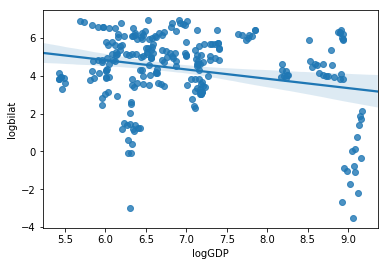

In [0]:
sns.regplot (y='logbilat', x='logGDP', data=df)
